In [65]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [102]:
df = pd.read_csv('property_data_readyToWork.csv')
df.head()

,Unnamed: 0,Price,NumBedrooms,NumBathrooms,Floor_Space,Frontyard_space_in_ft,Bathroom_Level,Bedroom_Level,Primary_Bedroom_Level,Architectural Style,Number_Parking_Spaces
0,0,1149000.0,5.0,5.0,2538.0,49.00,2,0,4,-1.0,4.0
1,1,998900.0,3.0,4.0,2728.0,49.00,-1,4,5,-1.0,7.0
2,2,799900.0,3.0,3.0,1665.0,38.00,2,4,4,-1.0,4.0
3,3,772888.0,3.0,4.0,1745.0,31.00,2,4,4,-1.0,3.0
4,4,624900.0,3.0,2.0,1585.0,30.28,4,4,4,3.0,3.0


array([[<AxesSubplot:title={'center':'Price'}>,
        <AxesSubplot:title={'center':'NumBedrooms'}>],
       [<AxesSubplot:title={'center':'NumBathrooms'}>,
        <AxesSubplot:title={'center':'Floor_Space'}>],
       [<AxesSubplot:title={'center':'Frontyard_space_in_ft'}>,
        <AxesSubplot:title={'center':'Number_Parking_Spaces'}>]],
      dtype=object)

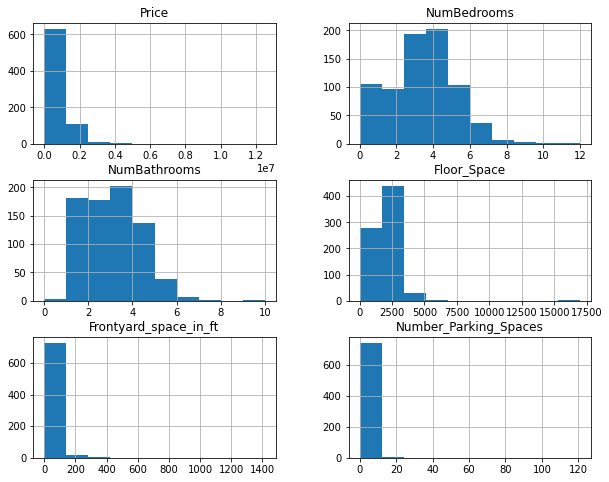

In [103]:
df[['Price', 'NumBedrooms', 'NumBathrooms', 'Floor_Space', 'Frontyard_space_in_ft', 'Number_Parking_Spaces']].hist(figsize=(10, 8))

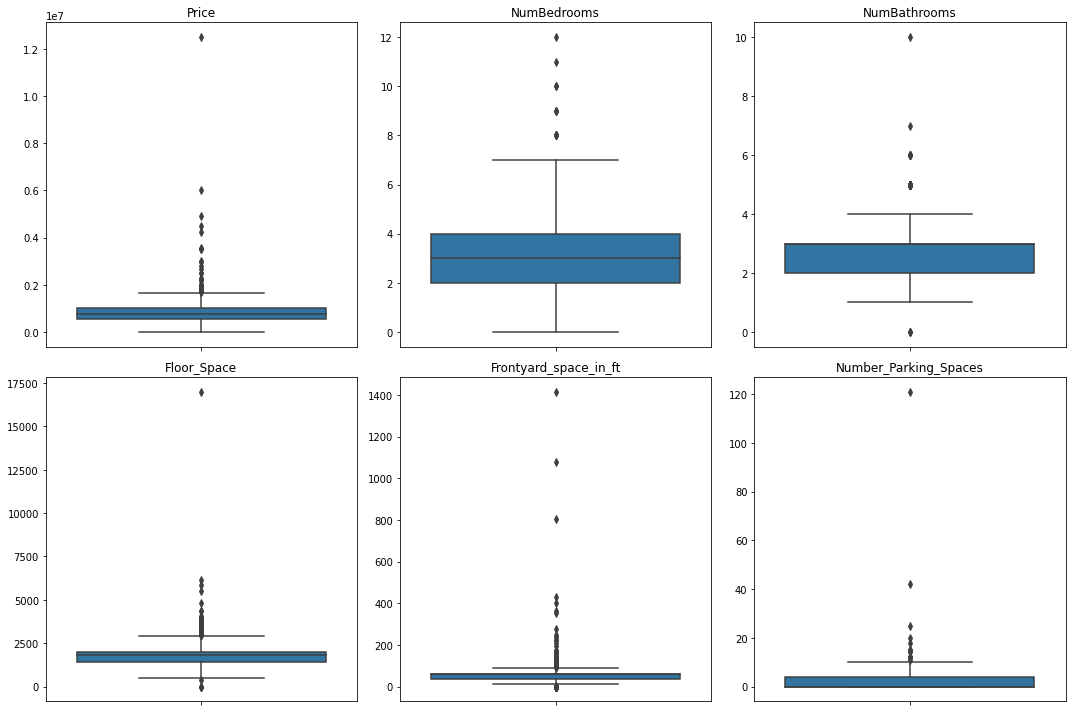

In [104]:
### We can easily see there is outliers in those numerical value 
#  By removing we can understand the pettern in  better way..

import matplotlib.pyplot as plt
import seaborn as sns

# List of columns to visualize
columns_to_viz = ['Price', 'NumBedrooms', 'NumBathrooms', 'Floor_Space', 'Frontyard_space_in_ft', 'Number_Parking_Spaces']

plt.figure(figsize=(15, 10))

# Plotting distributions for each column
for i, col in enumerate(columns_to_viz, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[col])
    plt.title(col)
    plt.ylabel('')

plt.tight_layout()
plt.show()


In [105]:
cap_thresholds_upper = {
    'Price': df['Price'].quantile(0.95),
    'NumBedrooms': 6,
    'NumBathrooms': 5,
    'Floor_Space': df['Floor_Space'].quantile(0.90),
    'Frontyard_space_in_ft': df['Frontyard_space_in_ft'].quantile(0.90),
    'Number_Parking_Spaces': 10
}

cap_thresholds_lower = {
    'Price': df['Price'].quantile(0.1),
    'NumBedrooms': 1,   # assuming minimum acceptable value
    'NumBathrooms': 1,  # assuming minimum acceptable value
    'Floor_Space': df['Floor_Space'].quantile(0.1),
    'Frontyard_space_in_ft': df['Frontyard_space_in_ft'].quantile(0.1),
    'Number_Parking_Spaces': 1  # assuming minimum acceptable value
}

# Cap the values based on thresholds
for column in cap_thresholds_upper.keys():
    df[column] = df[column].clip(upper=cap_thresholds_upper[column], lower=cap_thresholds_lower[column])

# Check summary statistics after capping
capped_summary = df[cap_thresholds_upper.keys()].describe()

print(capped_summary)

              Price  NumBedrooms  NumBathrooms  Floor_Space  \
count  7.500000e+02   750.000000    750.000000   750.000000   
mean   8.505348e+05     3.337333      2.577333  1775.883420   
std    4.028618e+05     1.413106      1.216824   532.867830   
min    3.744000e+05     1.000000      1.000000   949.885000   
25%    5.662250e+05     2.000000      2.000000  1399.250000   
50%    7.599500e+05     3.000000      3.000000  1839.284226   
75%    9.999000e+05     4.000000      3.000000  2000.000000   
max    1.863300e+06     6.000000      5.000000  2745.300000   

       Frontyard_space_in_ft  Number_Parking_Spaces  
count             750.000000             750.000000  
mean               50.584497               2.493333  
std                13.069942               2.226034  
min                30.000000               1.000000  
25%                37.500000               1.000000  
50%                58.570683               1.000000  
75%                58.570683               4.000000  


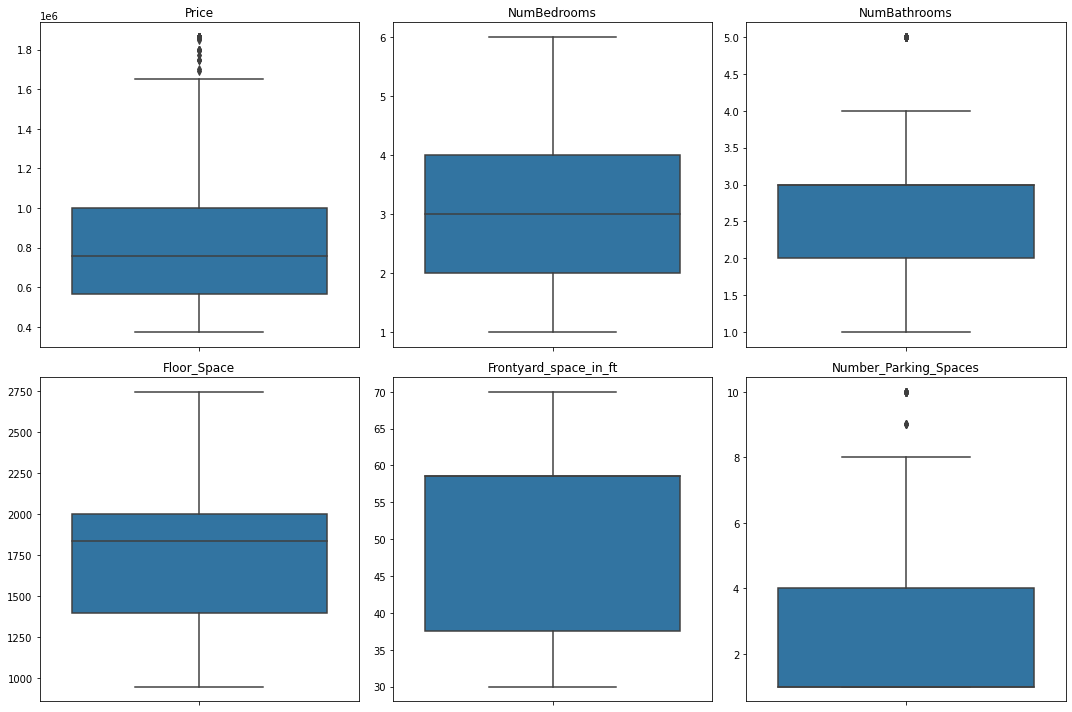

In [106]:

import matplotlib.pyplot as plt
import seaborn as sns

# List of columns to visualize
columns_to_viz = ['Price', 'NumBedrooms', 'NumBathrooms', 'Floor_Space', 'Frontyard_space_in_ft', 'Number_Parking_Spaces']

plt.figure(figsize=(15, 10))

# Plotting distributions for each column
for i, col in enumerate(columns_to_viz, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[col])
    plt.title(col)
    plt.ylabel('')

plt.tight_layout()
plt.show()

array([[<AxesSubplot:title={'center':'Price'}>,
        <AxesSubplot:title={'center':'NumBedrooms'}>],
       [<AxesSubplot:title={'center':'NumBathrooms'}>,
        <AxesSubplot:title={'center':'Floor_Space'}>],
       [<AxesSubplot:title={'center':'Frontyard_space_in_ft'}>,
        <AxesSubplot:title={'center':'Number_Parking_Spaces'}>]],
      dtype=object)

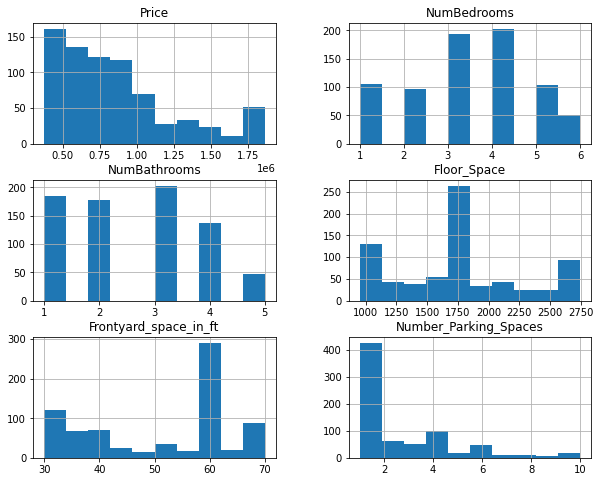

In [107]:
df[['Price', 'NumBedrooms', 'NumBathrooms', 'Floor_Space', 'Frontyard_space_in_ft', 'Number_Parking_Spaces']].hist(figsize=(10, 8))

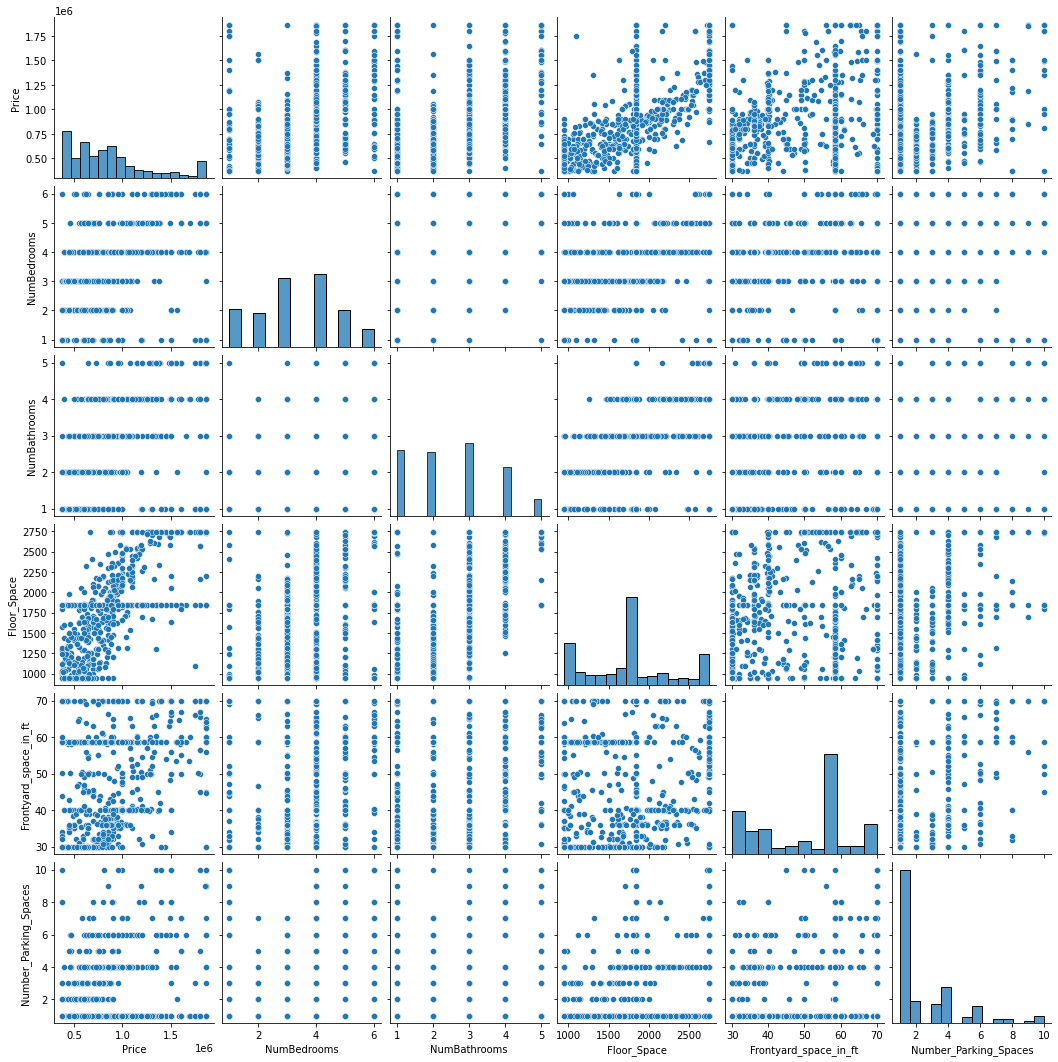

<AxesSubplot:>

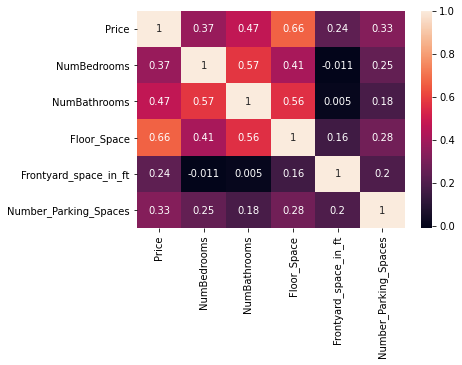

In [108]:
sns.pairplot(df[['Price', 'NumBedrooms', 'NumBathrooms', 'Floor_Space', 'Frontyard_space_in_ft', 'Number_Parking_Spaces']])
plt.show()

correlation = df[['Price', 'NumBedrooms', 'NumBathrooms', 'Floor_Space', 'Frontyard_space_in_ft', 'Number_Parking_Spaces']].corr()
sns.heatmap(correlation, annot=True)

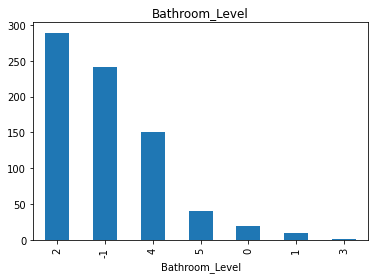

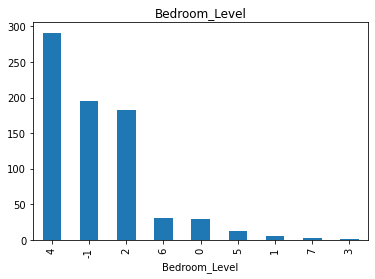

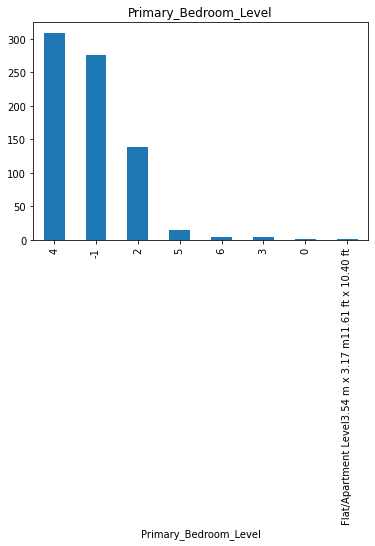

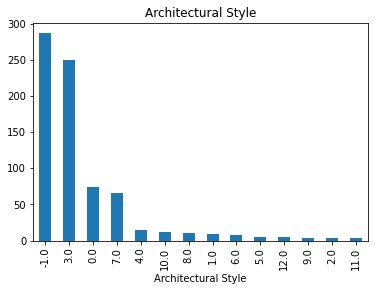

In [109]:
categorical_cols = ['Bathroom_Level', 'Bedroom_Level', 'Primary_Bedroom_Level', 'Architectural Style']
for col in categorical_cols:
    df[col].value_counts().plot(kind='bar', title=col)
    plt.show()

In [110]:

primary_bedroom_level_dist = df['Primary_Bedroom_Level'].value_counts()

primary_bedroom_level_dist

Primary_Bedroom_Level
4                                                         309
-1                                                        276
2                                                         138
5                                                          15
6                                                           5
3                                                           4
0                                                           2
Flat/Apartment Level3.54 m x 3.17 m11.61 ft x 10.40 ft      1
Name: count, dtype: int64

In [111]:
# As we can see most of the value destributed between '2nd Level'[4],'Main Level'[2],
#  and missing value which was initially values [-1] and there are other value hich is very less
# to make is simple and reduce overfitting I wiil make it only 3 cetagory.. 1 - [other], 2 [Main Level], 3 [2nd Level]

def recategorize(level):
    data = []
    for i in level:
        if str(i) == '4':
            data.append(3)
        elif str(i) == '2':
            data.append(2)
        else:
            data.append(1)
    return data


In [112]:
data = recategorize(df['Primary_Bedroom_Level'])
df['Primary_Bedroom_Level'] = data
primary_bedroom_level_dist = df['Primary_Bedroom_Level'].value_counts()

primary_bedroom_level_dist

Primary_Bedroom_Level
3    309
1    303
2    138
Name: count, dtype: int64

In [113]:

primary_bedroom_level_dist = df['Bedroom_Level'].value_counts()

primary_bedroom_level_dist

Bedroom_Level
 4    291
-1    195
 2    182
 6     31
 0     29
 5     12
 1      6
 7      3
 3      1
Name: count, dtype: int64

In [114]:
data = recategorize(df['Bedroom_Level'])
df['Bedroom_Level'] = data
primary_bedroom_level_dist = df['Bedroom_Level'].value_counts()

primary_bedroom_level_dist

Bedroom_Level
3    291
1    277
2    182
Name: count, dtype: int64

In [115]:
primary_bedroom_level_dist = df['Bedroom_Level'].value_counts()

primary_bedroom_level_dist

Bedroom_Level
3    291
1    277
2    182
Name: count, dtype: int64

In [116]:
# in bathroom level also the same and 5[other value]. like before I will change this value like before

data = recategorize(df['Bathroom_Level'])
df['Bathroom_Level'] = data
bedroom_level_dist = df['Bathroom_Level'].value_counts()

bedroom_level_dist


Bathroom_Level
1    311
2    289
3    150
Name: count, dtype: int64

In [117]:
primary_bedroom_level_dist = df['Architectural Style'].value_counts()

primary_bedroom_level_dist

Architectural Style
-1.0     287
 3.0     250
 0.0      74
 7.0      66
 4.0      15
 10.0     12
 8.0      11
 1.0       9
 6.0       7
 5.0       5
 12.0      5
 9.0       3
 2.0       3
 11.0      3
Name: count, dtype: int64

In [ ]:
# there are many different architecture for the sake of simplicity drom this variable

In [118]:
df = df.drop(['Architectural Style'], axis=1)

In [ ]:
# Compare the cetagorical value.. is are are basiccaly same then I can remove and use only one.

In [119]:
bedroom_bathroom_ct = pd.crosstab(df['Bedroom_Level'], df['Bathroom_Level'])
print(bedroom_bathroom_ct)

Bathroom_Level    1    2    3
Bedroom_Level                
1               223   38   16
2                32  148    2
3                56  103  132


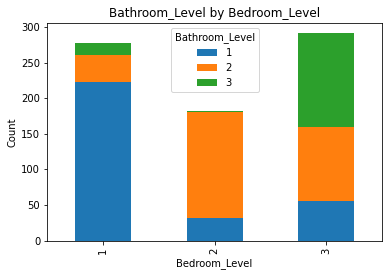

In [120]:
bedroom_bathroom_ct.plot(kind='bar', stacked=True)
plt.title('Bathroom_Level by Bedroom_Level')
plt.ylabel('Count')
plt.xlabel('Bedroom_Level')
plt.show()

In [121]:
bedroom_bathroom_ct = pd.crosstab(df['Bedroom_Level'], df['Primary_Bedroom_Level'])
print(bedroom_bathroom_ct)

Primary_Bedroom_Level    1    2    3
Bedroom_Level                       
1                      189   26   62
2                       69  103   10
3                       45    9  237


               count           mean            std       min       25%  \
Bedroom_Level                                                            
1              277.0  850033.093863  446296.956947  374400.0  549900.0   
2              182.0  675084.401099  316152.979896  374400.0  424900.0   
3              291.0  960744.168385  368400.388040  374400.0  727450.0   

                    50%        75%        max  
Bedroom_Level                                  
1              726000.0   999900.0  1863300.0  
2              599900.0   811217.5  1863300.0  
3              889900.0  1100000.0  1863300.0  
                count          mean            std       min       25%  \
Bathroom_Level                                                           
1               311.0  8.486330e+05  427029.886481  374400.0  576500.0   
2               289.0  7.537807e+05  331826.973673  374400.0  499000.0   
3               150.0  1.040891e+06  411069.322783  374400.0  749900.0   

                  

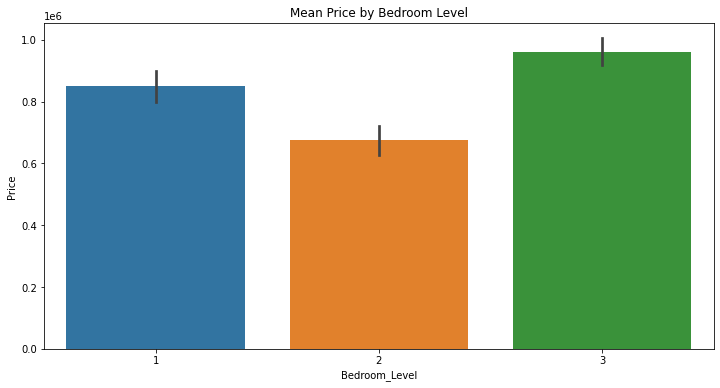

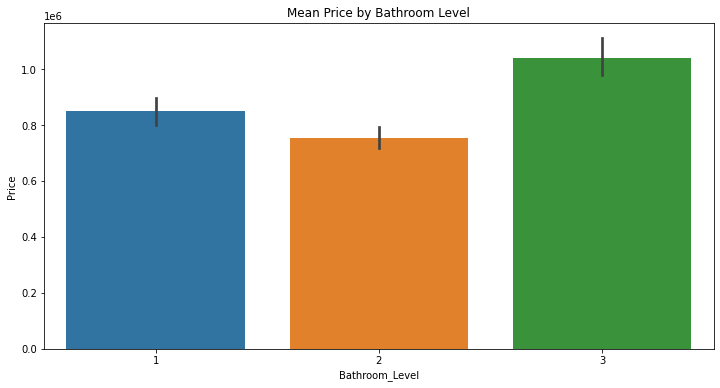

In [122]:

import scipy.stats as stats

# 1. Descriptive Statistics
print(df.groupby('Bedroom_Level')['Price'].describe())
print(df.groupby('Bathroom_Level')['Price'].describe())

# 2. Boxplots
plt.figure(figsize=(12, 6))
sns.barplot(x='Bedroom_Level', y='Price', data=df, estimator=np.mean)
plt.title('Mean Price by Bedroom Level')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='Bathroom_Level', y='Price', data=df, estimator=np.mean)
plt.title('Mean Price by Bathroom Level')
plt.show()

In [124]:
df.to_csv('property_data_ready_for_model.csv', index=False)